# Local-Closed-form solution of linear regression

http://www.dsplog.com/2011/12/04/closed-form-solution-linear-regression/


- visit the above link for the proof 𝛽̂ =(𝑋𝑇𝑋)−1𝑋𝑇𝑦

![alt text](closedform.png "closed form solution")

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_regression

In [2]:
x,y=make_regression(n_features=1,n_informative=1,n_samples=1000,noise=1.5,random_state=11)

In [3]:
print(x.shape)

(1000, 1)


### Reshape of Y

In [4]:
y=y.reshape((-1,1))

In [5]:
print(y.shape)

(1000, 1)


In [6]:
X=(x-x.mean())/x.std()
Y=y

# Data visualization

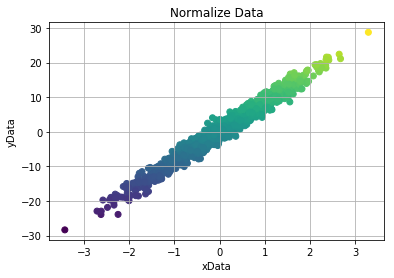

In [19]:
plt.figure()
plt.scatter(X,Y,c=Y)
plt.title('Normalize Data')
plt.xlabel('xData')
plt.ylabel('yData')
plt.grid()

### I have saved the csv into datasets folder

df=pd.DataFrame(X,columns=['X'])

df.to_csv('localx.csv',index=False)

df1=pd.DataFrame(Y,columns=['Y'])

df1.to_csv('localy.csv',index=False)

### Adding ones into x and stacking into new matrix 

In [20]:
ones=np.ones((X.shape[0],1))
stack=np.hstack((X,ones))
print(stack.shape)
print(stack[:5,:])

(1000, 2)
[[-0.00583751  1.        ]
 [ 0.05535279  1.        ]
 [-0.4697211   1.        ]
 [-1.51305202  1.        ]
 [-1.67693828  1.        ]]


### predict function

In [21]:
def predict(X,theta):
    return np.dot(X,theta)

# Closed form function

In [22]:
def getThetaClosedform(X,Y):
    Y=np.mat(Y)
    firstpart=np.dot(X.T,X)
    secondpart=np.dot(X.T,Y)
    theta=np.linalg.pinv(firstpart)*secondpart
    return theta

### Final theta

In [23]:
theta=getThetaClosedform(stack,Y)

In [24]:
print(theta)

[[ 8.4005091 ]
 [-0.04542056]]


# visualization of data and prediction

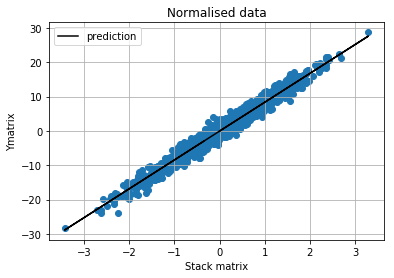

In [25]:
plt.figure()
plt.scatter(X,Y)
plt.plot(X,predict(stack,theta),c='k',label="prediction")
plt.legend()
plt.title("Normalised data")
plt.xlabel("Stack matrix")
plt.ylabel('Ymatrix')
plt.grid()
